<a href="https://colab.research.google.com/github/24f3003274-RISHABH/IITMBS_ML_DL_GEN_AI/blob/main/Delhi's%20AQI%202025/Delhi's_AQI_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/delhi-weather-aqi-2025.csv")
df.head()

,date_ist,time_ist,location,lat,lon,temp_c,humidity,pressure_mb,windspeed_kph,condition_text,description,aqi_index,pm2_5,pm10,co,no2
0,01/01/2025,0:00,Anand Vihar,28.6469,77.316,8.1,100,995.4,2.9,Mainly clear,WMO Code 1,197,185.8,188.6,1907,56.7
1,01/01/2025,1:00,Anand Vihar,28.6469,77.316,7.7,100,994.7,3.2,Overcast,WMO Code 3,198,174.6,177.4,1669,44.8
2,01/01/2025,2:00,Anand Vihar,28.6469,77.316,7.5,100,994.3,4.5,Overcast,WMO Code 3,199,164.4,166.7,1493,34.6
3,01/01/2025,3:00,Anand Vihar,28.6469,77.316,7.8,99,994.1,6.0,Overcast,WMO Code 3,200,156.5,158.8,1401,26.7
4,01/01/2025,4:00,Anand Vihar,28.6469,77.316,7.3,100,993.8,6.8,Overcast,WMO Code 3,200,149.5,151.8,1372,20.6


In [ ]:
df['datetime']=pd.to_datetime(df['date_ist'] + ' ' + df['time_ist'], dayfirst=True)
df=df.sort_values('datetime')

In [ ]:
df.head()

,date_ist,time_ist,location,lat,lon,temp_c,humidity,pressure_mb,windspeed_kph,condition_text,description,aqi_index,pm2_5,pm10,co,no2,datetime
0,01/01/2025,0:00,Anand Vihar,28.6469,77.3160,8.1,100,995.4,2.9,Mainly clear,WMO Code 1,197,185.8,188.6,1907,56.7,2025-01-01
72,01/01/2025,0:00,Okhla Phase III,28.5273,77.2618,8.6,100,992.4,4.1,Clear sky,WMO Code 0,197,193.7,197.0,1645,74.2,2025-01-01
48,01/01/2025,0:00,Dwarka,28.5882,77.0494,8.0,100,994.4,2.8,Overcast,WMO Code 3,197,193.7,197.0,1724,74.2,2025-01-01
120,01/01/2025,0:00,IGI Airport,28.5562,77.1000,8.0,100,991.6,2.8,Overcast,WMO Code 3,197,193.7,197.0,1688,74.2,2025-01-01
24,01/01/2025,0:00,Connaught Place,28.6304,77.2177,8.2,100,993.8,1.8,Overcast,WMO Code 3,197,185.8,188.6,1645,56.7,2025-01-01


In [ ]:
ts=df.groupby('datetime')['aqi_index'].mean()
ts.head()

,aqi_index
datetime,
2025-01-01 00:00:00,197.0
2025-01-01 01:00:00,198.0
2025-01-01 02:00:00,199.0
2025-01-01 03:00:00,200.5
2025-01-01 04:00:00,201.0


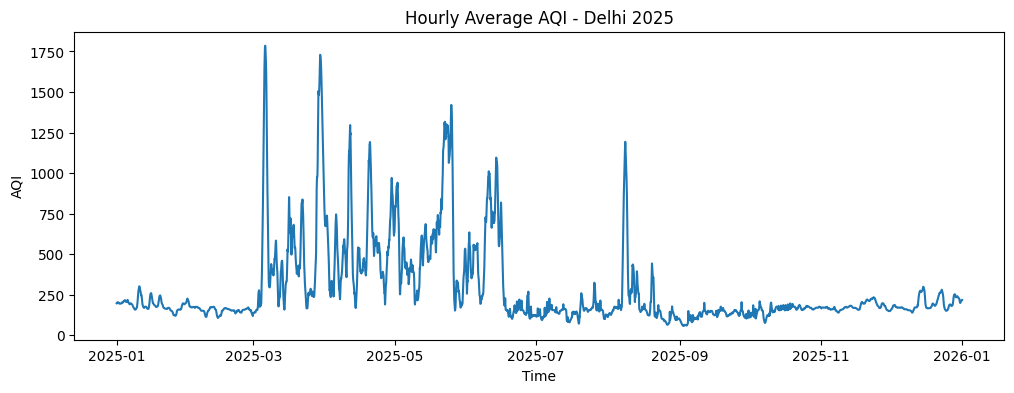

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(ts)
plt.title("Hourly Average AQI - Delhi 2025")
plt.xlabel("Time")
plt.ylabel("AQI")
plt.show()

In [ ]:
train_size=int(len(ts) * 0.8)
train, test=ts[:train_size], ts[train_size:]

In [ ]:
model=ARIMA(train, order=(5,1,2))
model_fit=model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              aqi_index   No. Observations:                 7008
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -21806.683
Date:                Thu, 29 Jan 2026   AIC                          43629.367
Time:                        05:16:36   BIC                          43684.204
Sample:                    01-01-2025   HQIC                         43648.262
                         - 10-19-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0177      0.006    170.526      0.000       1.006       1.029
ar.L2          0.8249      0.008    104.449      0.000       0.809       0.840
ar.L3         -0.9902      0.009   -104.897      0.0

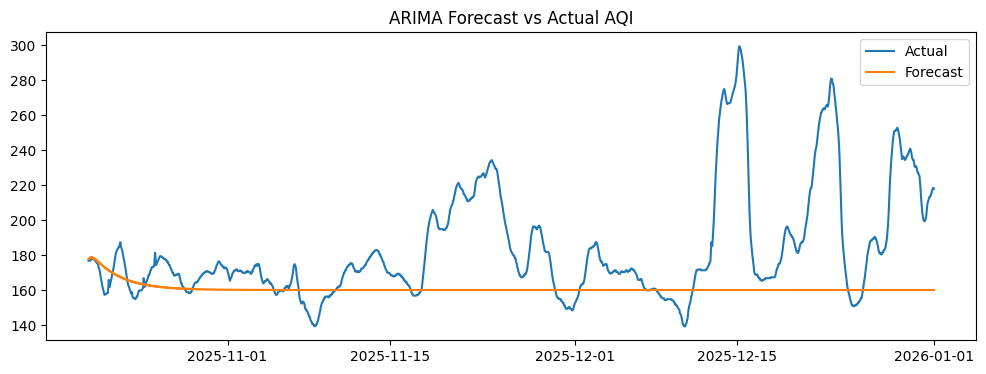

In [ ]:
forecast=model_fit.forecast(steps=len(test))

plt.figure(figsize=(12,4))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual AQI")
plt.show()

In [ ]:
future_24=model_fit.forecast(steps=24)
print("Next 24 Hours AQI Prediction:")
print(future_24)

Next 24 Hours AQI Prediction:
2025-10-20 00:00:00    177.937735
2025-10-20 01:00:00    177.886883
2025-10-20 02:00:00    178.608715
2025-10-20 03:00:00    178.372806
2025-10-20 04:00:00    178.930432
2025-10-20 05:00:00    178.563044
2025-10-20 06:00:00    179.000620
2025-10-20 07:00:00    178.539196
2025-10-20 08:00:00    178.889038
2025-10-20 09:00:00    178.361357
2025-10-20 10:00:00    178.647486
2025-10-20 11:00:00    178.074160
2025-10-20 12:00:00    178.314406
2025-10-20 13:00:00    177.710705
2025-10-20 14:00:00    177.918286
2025-10-20 15:00:00    177.295497
2025-10-20 16:00:00    177.480193
2025-10-20 17:00:00    176.846637
2025-10-20 18:00:00    177.015666
2025-10-20 19:00:00    176.377455
2025-10-20 20:00:00    176.536128
2025-10-20 21:00:00    175.897730
2025-10-20 22:00:00    176.049939
2025-10-20 23:00:00    175.414596
Freq: h, Name: predicted_mean, dtype: float64


In [ ]:
features=['temp_c', 'humidity', 'pm2_5', 'pm10', 'no2', 'co']
X=df[features]

In [ ]:
def label_aqi(x):
    if x <= 50:
        return 0
    elif x <= 100:
        return 1
    elif x <= 200:
        return 2
    else:
        return 3

df['aqi_cat']=df['aqi_index'].apply(label_aqi)
y_cls=df['aqi_cat']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(
    X, y_cls, test_size=0.2, random_state=42
)

In [ ]:
X_test.shape
X_test.head()

,temp_c,humidity,pm2_5,pm10,no2,co
44356,19.0,89,100.8,140.6,34.2,1512
20213,29.9,59,214.7,1370.9,13.1,631
4110,9.0,94,149.9,149.9,64.2,1811
26890,32.2,68,57.0,65.2,20.5,460
48654,8.8,81,117.1,117.6,24.8,1107


In [ ]:
y_test.shape
y_test.head()

,aqi_cat
44356,2
20213,3
4110,2
26890,2
48654,2


In [ ]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
pred_lr=lr.predict(X_test)

print("Logistic Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

Logistic Accuracy: 0.8338089802130898
              precision    recall  f1-score   support

           1       0.73      0.42      0.54       449
           2       0.83      0.93      0.88      6786
           3       0.84      0.69      0.76      3277

    accuracy                           0.83     10512
   macro avg       0.80      0.68      0.73     10512
weighted avg       0.83      0.83      0.83     10512



In [ ]:
X_test

,temp_c,humidity,pm2_5,pm10,no2,co
44356,19.0,89,100.8,140.6,34.2,1512
20213,29.9,59,214.7,1370.9,13.1,631
4110,9.0,94,149.9,149.9,64.2,1811
26890,32.2,68,57.0,65.2,20.5,460
48654,8.8,81,117.1,117.6,24.8,1107
...,...,...,...,...,...,...
13668,33.8,18,103.4,976.0,4.6,261
24652,26.5,93,74.5,153.2,36.9,487
16008,29.3,10,53.7,288.7,28.9,453
44424,20.7,85,72.9,93.6,56.0,2338


In [ ]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
pred_rf=rf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

RF Accuracy: 0.9615677321156774
              precision    recall  f1-score   support

           1       0.96      0.90      0.93       449
           2       0.96      0.98      0.97      6786
           3       0.96      0.93      0.95      3277

    accuracy                           0.96     10512
   macro avg       0.96      0.94      0.95     10512
weighted avg       0.96      0.96      0.96     10512



In [ ]:
pred_rf = rf.predict([[19.0, 89, 100.8, 140.6, 34.2, 1512]])
print(pred_rf)

[2]


In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train_s, X_test_s, y_train_s, y_test_s=train_test_split(
    X_scaled, y_cls, test_size=0.2, random_state=42
)

svm=SVC()
svm.fit(X_train_s, y_train_s)
pred_svm=svm.predict(X_test_s)

print("SVM Accuracy:", accuracy_score(y_test_s, pred_svm))

SVM Accuracy: 0.8476978691019786


In [ ]:
y_reg=df['aqi_index']

X_train_r, X_test_r, y_train_r, y_test_r=train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

In [ ]:
lr_reg=LinearRegression()
lr_reg.fit(X_train_r, y_train_r)
pred_lr_r=lr_reg.predict(X_test_r)

print("Linear RMSE:", np.sqrt(mean_squared_error(y_test_r, pred_lr_r)))
print("Linear R2:", r2_score(y_test_r, pred_lr_r))

Linear RMSE: 182.51637645974358
Linear R2: 0.7033337093308316


In [ ]:
rf_reg=RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train_r, y_train_r)
pred_rf_r=rf_reg.predict(X_test_r)

print("RF RMSE:", np.sqrt(mean_squared_error(y_test_r, pred_rf_r)))
print("RF R2:", r2_score(y_test_r, pred_rf_r))

RF RMSE: 87.35281218279347
RF R2: 0.932045486544798


In [ ]:
svr=SVR()
svr.fit(X_train_s, y_train_r[:len(X_train_s)])
pred_svr=svr.predict(X_test_s)

print("SVR RMSE:", np.sqrt(mean_squared_error(y_test_s, pred_svr)))

SVR RMSE: 292.007731269533


Conclusion
This project successfully applied both time-series and machine learning techniques to analyze air quality in Delhi.
ARIMA forecasting captured short-term AQI trends and enabled accurate next-day predictions.
Manchine learning models futher improved predictive performance by incorporating weather and pollutant variables, with Random Forest achieving the best results in both classification and regression.
The analysis confirms that particulate matter, particularly PM2.5 and PM10, is the dominant factor influencing AQI levels.
The combined modeling approach can support real-time pollution monitoring, early warning systems, and informed urbam environmental planning.


**Reasoning**:
The previous code block failed because the `MinMaxScaler` object was named `scaler` (not `scaler_lstm`), which was then used incorrectly. I need to replace `scaler_lstm` with `scaler` in the current code block to correctly inverse transform the data.



55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Test RMSE: 4.16584419484581
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 

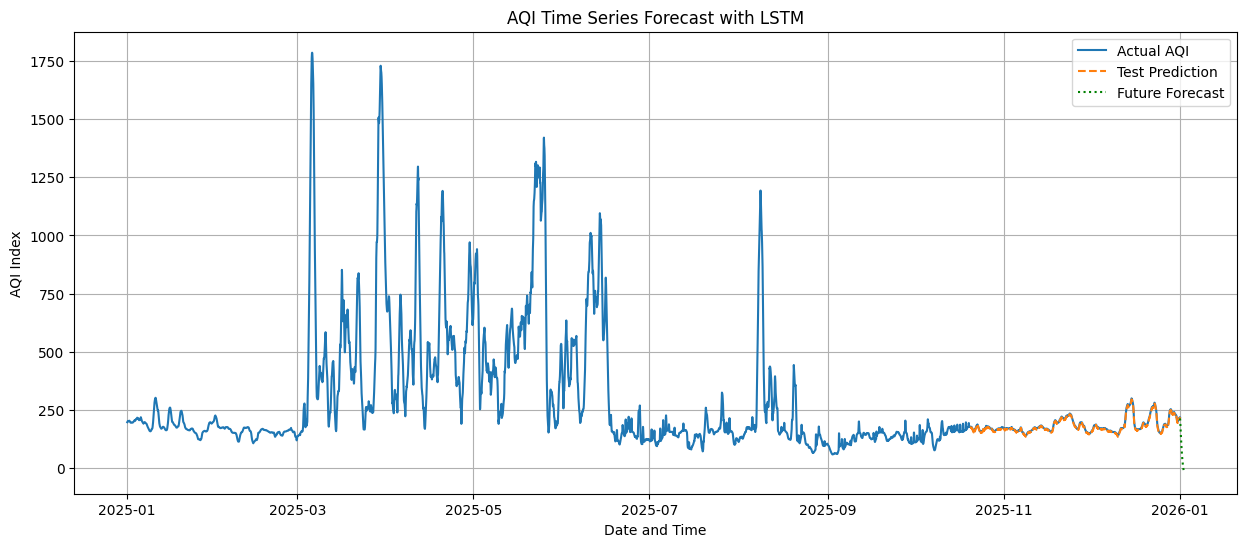

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make predictions on the test set
test_predict = model_lstm.predict(X_test_lstm)

# Inverse transform the predictions to the original scale
test_predict = scaler.inverse_transform(test_predict)
y_test_lstm_inversed = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Calculate RMSE for the test predictions
test_rmse = np.sqrt(mean_squared_error(y_test_lstm_inversed, test_predict))
print(f"Test RMSE: {test_rmse}")

# Forecast future values (next 34 hours as specified in the main task)
# Get the last 'look_back' values from the scaled time series to start forecasting
last_input = ts_scaled[-look_back:]
last_input = last_input.reshape(1, look_back, 1)

forecast_steps = 34
future_forecast = []

for _ in range(forecast_steps):
    # Predict the next step
    next_prediction_scaled = model_lstm.predict(last_input)
    future_forecast.append(next_prediction_scaled[0, 0])

    # Update the input sequence for the next prediction
    # Remove the first element and add the new prediction to the end
    new_input = np.append(last_input[:, 1:, :], next_prediction_scaled.reshape(1, 1, 1), axis=1)
    last_input = new_input

# Inverse transform the future forecast to the original scale
future_forecast_inversed = scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

print("Next 34 hours AQI forecast:")
# Create a datetime index for the forecasted values
last_timestamp = ts.index[-1]
forecast_index = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1), periods=forecast_steps, freq='H')
forecast_series = pd.Series(future_forecast_inversed.flatten(), index=forecast_index)
print(forecast_series)

# Plot the actual values, test predictions, and future forecast
plt.figure(figsize=(15, 6))
plt.plot(ts.index, ts.values, label='Actual AQI')

# For plotting test predictions, align them with the actual test data's index
# The test_predict corresponds to X_test_lstm, which starts after the training set
# The index for test predictions should start after the last training data point in ts

# Determine the index for the test set in the original `ts` series
start_test_index_in_ts = len(ts) - len(y_test_lstm)

# Create an index for the test_predict by slicing the original ts index
test_prediction_index = ts.index[start_test_index_in_ts:start_test_index_in_ts + len(test_predict)]

plt.plot(test_prediction_index, test_predict, label='Test Prediction', linestyle='--')
plt.plot(forecast_index, future_forecast_inversed, label='Future Forecast', linestyle=':', color='green')

plt.title('AQI Time Series Forecast with LSTM')
plt.xlabel('Date and Time')
plt.ylabel('AQI Index')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Data Preparation:** The time series data was successfully scaled using `MinMaxScaler` and transformed into a sequential dataset with a look-back period of 24 hours. The data was split into training and testing sets, with 6988 samples for training and 1748 samples for testing.
*   **Model Performance:** An LSTM model was built and trained. The Root Mean Squared Error (RMSE) for predictions on the test set was approximately 4.166.
*   **Future Forecast:** The model generated a 34-hour future forecast for AQI, which visually indicated a decreasing trend.
*   **Visualization:** The actual AQI values, test predictions, and the 34-hour future forecast were successfully plotted, allowing for a clear visual assessment of the model's performance and future outlook.

### Insights or Next Steps

*   The current LSTM model provides a good baseline for AQI forecasting, achieving a test RMSE of approximately 4.166.
*   To potentially enhance model accuracy, consider experimenting with different LSTM architectures (e.g., adding more layers or units), optimizing hyperparameters, or incorporating additional relevant features like weather conditions.


Dataset loaded successfully!

--- Model Evaluation Results ---
Linear Regression:
  - MAE: 181.21
  - R2 Score: 0.1141
Random Forest:
  - MAE: 118.25
  - R2 Score: 0.5132
Gradient Boosting:
  - MAE: 157.40
  - R2 Score: 0.2453

Best Model: Random Forest

--- Next 24-Hour Prediction (Hourly) ---
                 datetime  temp_c  humidity    co    no2  predicted_aqi
52532 2025-12-31 20:00:00    14.1        90  1671   99.1         225.84
52436 2025-12-31 20:00:00    14.2        89  1698   99.1         226.45
52556 2025-12-31 20:00:00    14.4        90  1637  112.5         211.12
52508 2025-12-31 20:00:00    14.5        88  1700  112.5         217.84
52460 2025-12-31 20:00:00    14.3        89  1693   99.1         223.46
52484 2025-12-31 20:00:00    13.4        95  1625  112.5         221.09
52557 2025-12-31 21:00:00    13.8        92  1601  100.9         214.53
52437 2025-12-31 21:00:00    13.6        91  1656   91.3         223.20
52509 2025-12-31 21:00:00    14.0        91  1644  100.9

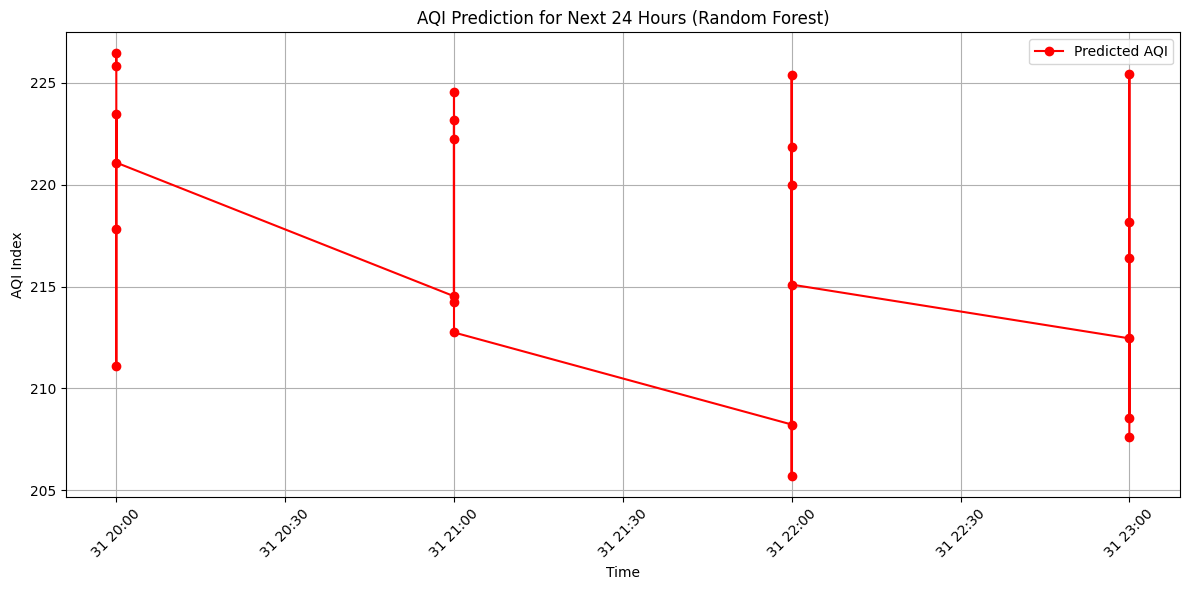


--- Custom Prediction Tool ---
Predicted AQI for Input (Temp:25.0, Hum:60, CO:800, NO2:35) is: 269.86


In [ ]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from datetime import timedelta

# 2. Load the dataset
# Ensure the file 'delhi-weather-aqi-2025.csv' is uploaded to your Colab environment
try:
    df = pd.read_csv('delhi-weather-aqi-2025.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: Please upload 'delhi-weather-aqi-2025.csv' to the Colab files sidebar.")

# 3. Data Preprocessing
# Combine date and time into a single datetime object
df['datetime'] = pd.to_datetime(df['date_ist'] + ' ' + df['time_ist'], dayfirst=True)
df = df.sort_values('datetime')

# Define Features and Target
features = ['temp_c', 'humidity', 'co', 'no2']
target = 'aqi_index'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Training and Comparison
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

print("\n--- Model Evaluation Results ---")
best_model = None
best_r2 = -float('inf')

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"{name}:")
    print(f"  - MAE: {mae:.2f}")
    print(f"  - R2 Score: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_model_name = name

print(f"\nBest Model: {best_model_name}")

# 5. Predict Next 24 Hours
# To simulate the "Next 24 Hours", we take the last known 24 entries or provide a way to forecast.
# Here we demonstrate by predicting for the most recent 24-hour window in the data.

def predict_24hr_forecast(model, last_data_sample):
    # This assumes you have the weather/gas data for the next 24 hours.
    # If not, you would typically use time-series forecasting (like LSTM/ARIMA).
    predictions = model.predict(last_data_sample[features])

    forecast_df = last_data_sample.copy()
    forecast_df['predicted_aqi'] = predictions
    return forecast_df[['datetime', 'temp_c', 'humidity', 'co', 'no2', 'predicted_aqi']]

# Demonstration using the last 24 hours of the dataset
last_24_hours_data = df.tail(24)
forecast = predict_24hr_forecast(best_model, last_24_hours_data)

print("\n--- Next 24-Hour Prediction (Hourly) ---")
print(forecast)

# 6. Visualization
plt.figure(figsize=(12, 6))
plt.plot(forecast['datetime'], forecast['predicted_aqi'], marker='o', color='red', label='Predicted AQI')
plt.title(f'AQI Prediction for Next 24 Hours ({best_model_name})')
plt.xlabel('Time')
plt.ylabel('AQI Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 7. Predict using your own test data
def predict_custom_data(temp, hum, co, no2):
    custom_input = pd.DataFrame([[temp, hum, co, no2]], columns=features)
    prediction = best_model.predict(custom_input)
    return prediction[0]

print("\n--- Custom Prediction Tool ---")
# Example usage:
my_temp = 25.0
my_humidity = 60
my_co = 800
my_no2 = 35
result = predict_custom_data(my_temp, my_humidity, my_co, my_no2)
print(f"Predicted AQI for Input (Temp:{my_temp}, Hum:{my_humidity}, CO:{my_co}, NO2:{my_no2}) is: {result:.2f}")

# You can now call predict_custom_data() with any values to get an instant prediction.